In [1]:
import re, math, random # regexes, math functions, random numbers 
import matplotlib.pyplot as plt # pyplot
from collections import defaultdict, Counter
from functools import partial, reduce

In [2]:
height_weight_age = [70, 170, 40]
grades = [95, 80, 75, 62]

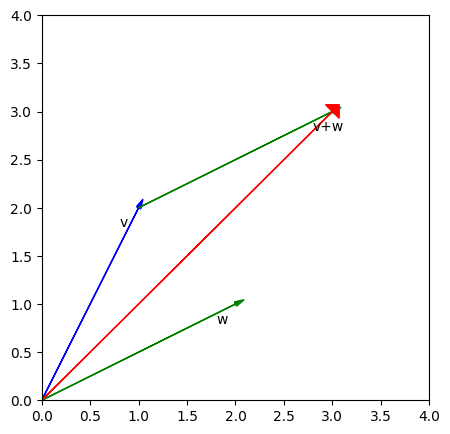

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5)) 
plt.axis([0,4,0,4])
v = np.array([1,2])
w = np.array([2,1])
plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, fc='b', ec='b') 
plt.arrow(0, 0, w[0], w[1], head_width=0.05, head_length=0.1, fc='g', ec='g') 
plt.arrow(v[0], v[1], w[0], w[1], head_width=0.05, head_length=0.1, fc='g', ec='g') 
plt.arrow(0, 0, v[0]+w[0], v[1]+w[1], head_width=0.20, head_length=0.1, fc='r', ec='r') 
offset=np.array([-0.2,-0.2])
plt.annotate('v', xy=v+offset) # 주석으로 표시하는 텍스트 문자열
plt.annotate('w', xy=w+offset)
plt.annotate('v+w', xy=v+w+offset)
plt.show()

In [5]:
def vector_add(v, w):
    """adds two vectors componentwise""" 
    return [v_i + w_i for v_i, w_i in zip(v,w)]

def vector_subtract(v, w):
    """subtracts two vectors componentwise""" 
    return [v_i - w_i for v_i, w_i in zip(v,w)]

def vector_sum(vectors):
    return reduce(vector_add, vectors)

def scalar_multiply(c, v): 
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [10]:
z = np.array([[1,3,5,7],[2,4,6,8]])
# g = np.array([2,4,6,8])
vector_sum(z)

[3, 7, 11, 15]

In [12]:

u = np.array([1,1,1]) 
v = np.array([1,0,0]) 
w = np.array([0,1,0]) 
print(v + w)
print(v - w)
vs = np.array([u ,v, w]) 
print(vs.shape)
print(np.sum(vs, axis=0)) 
print(np.sum(vs, axis=1)) 
print(10 * v) 
print(np.mean(vs, axis=0))

[1 1 0]
[ 1 -1  0]
(3, 3)
[2 2 1]
[3 1 1]
[10  0  0]
[0.66666667 0.66666667 0.33333333]


In [13]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n""" 
    return dot(v, v)
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

In [14]:
v = np.array([1,0,0])
w = np.array([0,1,0]) 
print(np.dot(v,w)) 
print(v.dot(w)) 
print(np.dot(v,v)) 
print(np.sqrt(np.dot(v,v))) 
print(np.linalg.norm(v))

0
0
1
1.0
1.0


In [15]:
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))

def manhattan_distance(v, w):
    return sum(math.fabs(v_i - w_i) for v_i, w_i in zip(v, w))

In [18]:
def cosine_similarity(v,w):
    return dot(v,w) / (magnitude(v) * magnitude(w))

v = [0,1,1,0]
w = [0,100,100,0]
u = [1,0,0,1]
y = [-1,0,0,-1]

print(cosine_similarity(v,w))
print(cosine_similarity(u,v))
print(cosine_similarity(u,y))

0.9999999999999999
1.0
0.0
-0.9999999999999998


In [19]:
v = np.array([1,1])
w = np.array([10,10])
print(np.dot(v - w, v - w))
print(np.sqrt(np.dot(v - w, v - w)))
print(np.sum(np.fabs(v - w)))
print(np.dot(v,w) / (np.sqrt(np.dot(v,v)) * np.sqrt(np.dot(w,w))))

162
12.727922061357855
18.0
0.9999999999999998


In [21]:
def cosine_distance(v, w):
    return 1 - cosine_similarity(v, w)

v = [0,1,1,0]
w = [0,100,100,0]
u = [1,0,0,1]
y = [-1,0,0,-1]

print(cosine_similarity(v,w))
print(cosine_similarity(u,v))
print(cosine_similarity(u,y))
print()
print(cosine_distance(v,w))
print(cosine_distance(u,v))
print(cosine_distance(u,y))


0.9999999999999999
0.0
-0.9999999999999998

1.1102230246251565e-16
1.0
1.9999999999999998


In [23]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0])
    return num_rows, num_cols

def get_row(A, i):
    return A[i]

def get_col(A, j):
    return [A_i[j] for A_i in A]

def make_matrix(num_rows, num_cols, entry_fn):
    return [[entry_fn(i,j) for j in range(num_cols)] for i in range(num_rows)]

def is_diagonal(i,j):
    return 1 if i == j else 0

identity_matrix = make_matrix(5, 5, is_diagonal)
print(identity_matrix)

import random
random_matrix = make_matrix(5, 5, lambda i, j: random.choice([0,1]))
random_matrix

[[1, 0, 0, 0, 0], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]]


[[0, 1, 0, 0, 0],
 [0, 1, 1, 0, 1],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1]]

In [24]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4],[5, 6]])

In [30]:
print(A.shape)
print(A[1,:])
print(A[:,1])
print(np.eye(5,5))
print(np.eye(4,2))



(2, 3)
[4 5 6]
[2 5]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]]


In [31]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [32]:
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
                [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1 
                [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2 
                [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3 
                [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4 
                [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5 
                [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6 
                [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7 
                [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8 
                [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

In [34]:
friendships[0][2] == 1
friendships[0][8] == 1

False

In [36]:
friends_of_five = [i for i, is_friend in enumerate(friendships[5]) if is_friend]
print(friends_of_five)

[4, 6, 7]


In [37]:
friendships = np.array(friendships)
friendships[0,2] == 1
friendships[0,8] == 1
np.argwhere(friendships[5] == 1)

array([[4],
       [6],
       [7]])

In [38]:
def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")
    
    num_rows, num_cols = shape(A)

    def entry_fn(i,j) : return A[i][j] + B[i][j]

    return make_matrix(num_rows, num_cols, entry_fn)

In [45]:
A = np.array([[1,1], [2,2]])
B = np.array([[3,3], [4,4]])
print(A+B)
print(A*B)
print()
print(np.transpose(A))
print(A.T)
print()
print(A.dot(B))
print(np.matmul(A,B))
print()
C = np.array([[1., 2.], [3., 4.]])
print(np.linalg.det(C))
print(np.linalg.inv(C))
print(C.dot(np.linalg.inv(C)))
print(np.linalg.eig(C))


[[4 4]
 [6 6]]
[[3 3]
 [8 8]]

[[1 2]
 [1 2]]
[[1 2]
 [1 2]]

[[ 7  7]
 [14 14]]
[[ 7  7]
 [14 14]]

-2.0000000000000004
[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]
(array([-0.37228132,  5.37228132]), array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]]))
